In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\user\AppData\Local\Temp\ipykernel_14136\3571176601.py:5: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, delimiter='|')



H₀: No risk difference across provinces (Claim Frequency)
ANOVA F-statistic: 13.5162, p-value: 0.0000

H₀: No margin difference across top 10 zip codes
ANOVA F-statistic: 1.1677, p-value: 0.3108

H₀: No risk difference between Men and Women (Claim Severity)
T-test statistic: -0.5790, p-value: 0.5680

H₀: Province and Gender are independent
Chi-squared statistic: 20399.4679, p-value: 0.0000


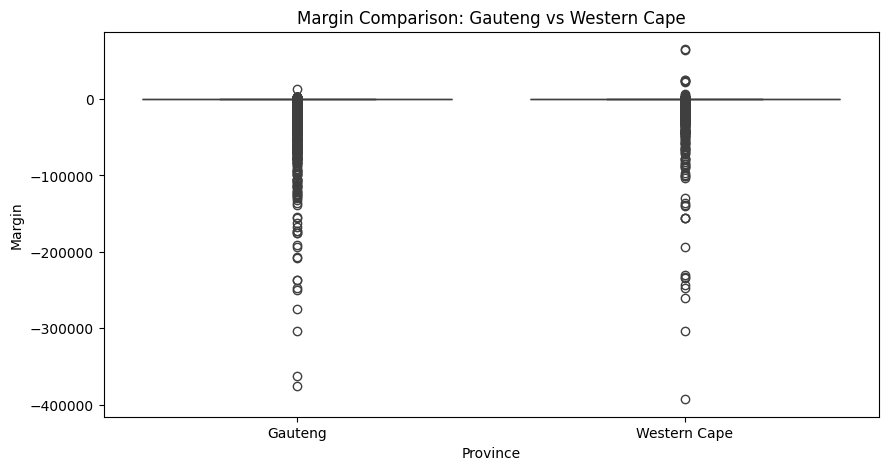

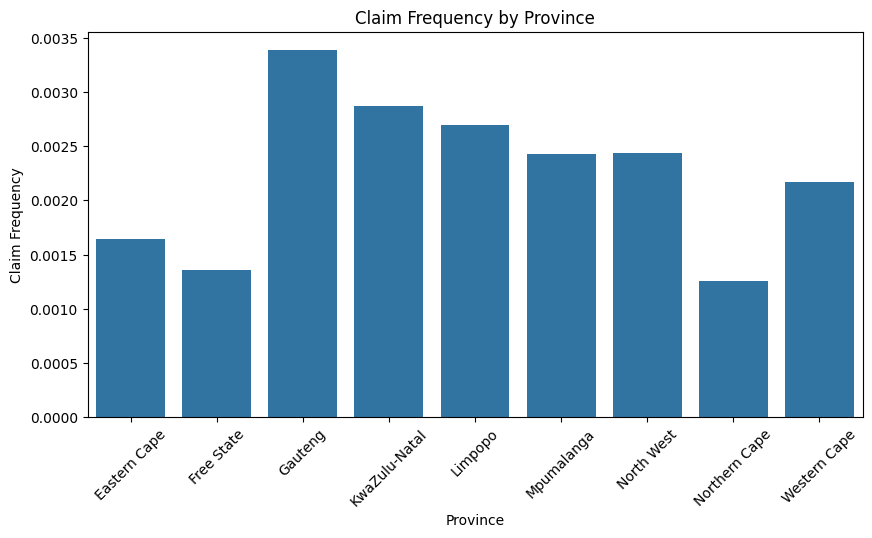


**Tasks Completed (Task 3)**
- Defined KPIs: Claim Frequency, Claim Severity, Margin
- Segmented data by Province, Zipcode, Gender
- Applied ANOVA, T-test, Chi-squared test
- Analyzed p-values to accept/reject null hypotheses
- Visualized province-wise margin and claim frequency


In [9]:
# Load the insurance dataset, engineer 'HasClaim' and 'Margin' columns, and drop incomplete records
# Returns a cleaned DataFrame ready for hypothesis testing

def load_and_prepare_data(filepath):
    df = pd.read_csv(filepath, delimiter='|')
    df['HasClaim'] = df['TotalClaims'] > 0
    df['Margin'] = df['TotalPremium'] - df['TotalClaims']
    df = df.dropna(subset=['Province', 'PostalCode', 'Gender', 'TotalClaims', 'TotalPremium'])
    return df

# Perform one-way ANOVA to test claim frequency differences across provinces
# H₀: No risk difference across provinces (Claim Frequency)

def test_province_claim_frequency(df):
    print("\nH₀: No risk difference across provinces (Claim Frequency)")
    groups = [df[df['Province'] == p]['HasClaim'] for p in df['Province'].unique()]
    result = stats.f_oneway(*groups)
    print(f"ANOVA F-statistic: {result.statistic:.4f}, p-value: {result.pvalue:.4f}")
    return result


# Perform one-way ANOVA to test margin differences among top 10 zip codes
# H₀: No significant profit margin difference between zip codes

def test_zipcode_margin(df):
    print("\nH₀: No margin difference across top 10 zip codes")
    top_zips = df['PostalCode'].value_counts().head(10).index
    groups = [df[df['PostalCode'] == z]['Margin'] for z in top_zips]
    result = stats.f_oneway(*groups)
    print(f"ANOVA F-statistic: {result.statistic:.4f}, p-value: {result.pvalue:.4f}")
    return result


# Perform independent t-test for claim severity by gender
# H₀: No significant risk difference between Women and Men (Claim Severity)

def test_gender_claim_severity(df):
    print("\nH₀: No risk difference between Men and Women (Claim Severity)")
    male = df[(df['Gender'] == 'Male') & (df['TotalClaims'] > 0)]['TotalClaims']
    female = df[(df['Gender'] == 'Female') & (df['TotalClaims'] > 0)]['TotalClaims']
    result = stats.ttest_ind(male, female, equal_var=False)
    print(f"T-test statistic: {result.statistic:.4f}, p-value: {result.pvalue:.4f}")
    return result


# Conduct chi-squared test to check independence between two categorical variables
# H₀: The two variables are independent

def chi_squared_test_categorical(df, col1, col2):
    print(f"\nH₀: {col1} and {col2} are independent")
    contingency = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = stats.chi2_contingency(contingency)
    print(f"Chi-squared statistic: {chi2:.4f}, p-value: {p:.4f}")
    return chi2, p


# Generate visualizations to support A/B testing insights
# Includes margin comparison and claim frequency by province

def visualize_results(df):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df[df['Province'].isin(['Gauteng', 'Western Cape'])], x='Province', y='Margin')
    plt.title("Margin Comparison: Gauteng vs Western Cape")
    plt.show()

    province_group = df.groupby('Province')['HasClaim'].mean()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=province_group.index, y=province_group.values)
    plt.title("Claim Frequency by Province")
    plt.ylabel("Claim Frequency")
    plt.xticks(rotation=45)
    plt.show()


# Main driver function that coordinates data loading, testing, and reporting

def main():
    df = load_and_prepare_data("../data/MachineLearningRating_v3.txt")

    test_province_claim_frequency(df)
    test_zipcode_margin(df)
    test_gender_claim_severity(df)
    chi_squared_test_categorical(df, 'Province', 'Gender')

    visualize_results(df)

    print("\n**Tasks Completed (Task 3)**")
    print("- Defined KPIs: Claim Frequency, Claim Severity, Margin")
    print("- Segmented data by Province, Zipcode, Gender")
    print("- Applied ANOVA, T-test, Chi-squared test")
    print("- Analyzed p-values to accept/reject null hypotheses")
    print("- Visualized province-wise margin and claim frequency")


if __name__ == '__main__':
    main()
